# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis
---

#### Tal Daniel

## Tutorial 07 - Deep Unsupervised Learning - PyTorch & Autoencoders
---


### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Introduction & Motivation](#-Introduction-&-Motivation)
* Up & Running with PyTorch
    * [PyTorch Basics](#-PyTorch-Basics)
    * [Datasets: MNIST, Fashion-MNIST](#-Datasets-in-PyTorch---MNIST-&-Fashion-MNIST)
    * [Multi-Layer Perceptrons (MLPs)](#-Multi-Layer-Perceptron-(MLP)-in-PyTorch)
    * [Extra: Convolutional Layers](#-Multi-Layer-Perceptron-(MLP)-in-PyTorch)
* [Autoencoders](#-Autoencoders)
    * [PyTorch Implementation]()
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, ConcatDataset
import torchvision

# scikit-learn imports
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from sklearn.decomposition import PCA, KernelPCA

## <img src="https://img.icons8.com/color/48/000000/fire-element.png" style="height:50px;display:inline" /> Introduction & Motivation
---
As you saw in the ML course, even though the idea of a neural network is a simple one, the implementation and calculations are not very sympathetic. Neural networks are a strong tool that might be useful to many sorts of tasks and thus simple frameworks were established to help engineers focus on the task rather than the actual implemntation of the neural networks and making the backpropagation easy as one line of code. There are several deep learning frameworks, where the two most popular ones are <a href="https://tensorflow.org">Tensorflow</a> (maintained by Google) and <a href="https://pytorch.org">PyTorch</a> (maintained by Facebook). TF and PyTorch have different workflows, though in recent versions they share some of the workflows.

<img src="./assets/tut_xiv_pytorch_logo.png" style="height:100px" />
PyTorch is "an open source deep learning platform that provides a seamless path from research prototyping to production deployment". In simple words, PyTorch is meant to make deep learning programming more easier for Python programmers by adapting the Python workflow and "easy-to-code" language.  Also, the PyTorch official website provides great tutorials to get you up and running in most deep learning fields (Computer Vision, Reinforcement Learning, Natural Language Processing).

At its core, PyTorch provides two main features:

* An n-dimensional Tensor, similar to numpy but can run on GPUs
* Automatic differentiation for building and training neural networks

The word "Tensor" might seem initmidating, but it is just an n-dimensional array or matrix.  A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing. Most of the function and methods available in `numpy` are also available in PyTorch for tensors. 

#### Why not just use NumPy?
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

### <img src="https://img.icons8.com/dusk/64/000000/diversity.png" style="height:50px;display:inline"> PyTorch Basics
---
We will now introduce some the basics. The main thing to keep in mind is that PyTorch was designed to have similar API as NumPy's. That means that almost every NumPy's function is in PyTorch, and most probably has the same name and same parameters.

In [3]:
# create a tensor initialized from a random uniform distribution
x = torch.Tensor(5, 3).uniform_(-1, 1)
print("x: \n", x)
print("x size:", x.size())
print("same as x shape:", x.shape)
print()

x: 
 tensor([[-0.9316, -0.2761,  0.7423],
        [-0.7188, -0.6464, -0.8161],
        [ 0.2640,  0.6787, -0.3176],
        [ 0.3718, -0.8876, -0.8888],
        [-0.1430, -0.6374, -0.8229]])
x size: torch.Size([5, 3])
same as x shape: torch.Size([5, 3])



In [4]:
# basic math oprations
y = torch.rand(5, 3)
print("y: \n", y)
print("x + y = \n", x + y)
print("x - y = \n", x - y)
print()

y: 
 tensor([[0.5636, 0.0164, 0.2488],
        [0.4739, 0.0954, 0.7210],
        [0.1011, 0.9942, 0.8188],
        [0.7817, 0.6225, 0.3460],
        [0.9175, 0.1450, 0.6944]])
x + y = 
 tensor([[-0.3680, -0.2596,  0.9911],
        [-0.2449, -0.5510, -0.0952],
        [ 0.3651,  1.6729,  0.5012],
        [ 1.1534, -0.2652, -0.5428],
        [ 0.7745, -0.4924, -0.1285]])
x - y = 
 tensor([[-1.4953, -0.2925,  0.4935],
        [-1.1927, -0.7417, -1.5371],
        [ 0.1630, -0.3155, -1.1363],
        [-0.4099, -1.5101, -1.2348],
        [-1.0605, -0.7825, -1.5172]])



In [5]:
# indexing - same as NumPy
print("x[3, :] = ", x[3, :])
print()

x[3, :] =  tensor([ 0.3718, -0.8876, -0.8888])



In [5]:
# ones, zeros, reshaping - same as NumPy
print("torch.ones([2, 2]): \n", torch.ones([2,2]))
print("torch.zeros([1, 2]): \n", torch.zeros([1,2]))
print("y.reshape(-1, 1): \n", y.reshape(-1, 1)) 
# -1 just means 'don't care about the dimension this axis, make it happen'
# more efficiently, use `view` as it doesn't copy the variable (saves memory)
print("y.view(-1, 1): \n", y.view(-1, 1))
print()

torch.ones([2, 2]): 
 tensor([[1., 1.],
        [1., 1.]])
torch.zeros([1, 2]): 
 tensor([[0., 0.]])
y.reshape(-1, 1): 
 tensor([[0.0746],
        [0.9194],
        [0.7642],
        [0.7937],
        [0.5881],
        [0.2956],
        [0.6239],
        [0.1899],
        [0.8838],
        [0.4624],
        [0.2099],
        [0.3366],
        [0.2956],
        [0.7547],
        [0.9789]])
y.view(-1, 1): 
 tensor([[0.0746],
        [0.9194],
        [0.7642],
        [0.7937],
        [0.5881],
        [0.2956],
        [0.6239],
        [0.1899],
        [0.8838],
        [0.4624],
        [0.2099],
        [0.3366],
        [0.2956],
        [0.7547],
        [0.9789]])



In [6]:
# torch <-> numpy
z = torch.tensor(np.array([[1, 2], [3, 4]]))
print("z: \n", z)
print()

z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



In [7]:
# torch <-> numpy, alternative verion
a = np.array([[1, 2], [3, 4]])
z = torch.from_numpy(a)
print("z: \n", z)
print()

z: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



In [6]:
p = x.numpy()
print("p = x.numpy(): \n", p)
print()

p = x.numpy(): 
 [[-0.93162763 -0.27608442  0.7423003 ]
 [-0.71882963 -0.6463584  -0.8161427 ]
 [ 0.26402986  0.678723   -0.31756258]
 [ 0.3717742  -0.8876412  -0.88880277]
 [-0.14297056 -0.6374365  -0.8228916 ]]



In [7]:
# tensor multiplication
xy = x @ y.t()
print("xy = x @ y.t(): \n", xy)
# or
xy = torch.matmul(x, y.t())
print("xy = torch.matmul(x, y.t()): \n", xy)
print()

xy = x @ y.t(): 
 tensor([[-0.3449,  0.0674,  0.2391, -0.6432, -0.3794],
        [-0.6189, -0.9907, -1.3835, -1.2466, -1.3199],
        [ 0.0810, -0.0391,  0.4415,  0.5190,  0.1202],
        [-0.0262, -0.5493, -1.5727, -0.5695, -0.4048],
        [-0.2958, -0.7218, -1.3220, -0.7933, -0.7950]])
xy = torch.matmul(x, y.t()): 
 tensor([[-0.3449,  0.0674,  0.2391, -0.6432, -0.3794],
        [-0.6189, -0.9907, -1.3835, -1.2466, -1.3199],
        [ 0.0810, -0.0391,  0.4415,  0.5190,  0.1202],
        [-0.0262, -0.5493, -1.5727, -0.5695, -0.4048],
        [-0.2958, -0.7218, -1.3220, -0.7933, -0.7950]])



In [8]:
# element-wise
xy = x * y
print("xy = x * y: \n", xy)
# or
xy = torch.mul(x, y)
print("xy = torch.mul(x, y): \n", xy)

xy = x * y: 
 tensor([[-0.5251, -0.0045,  0.1847],
        [-0.3406, -0.0616, -0.5884],
        [ 0.0267,  0.6748, -0.2600],
        [ 0.2906, -0.5525, -0.3075],
        [-0.1312, -0.0924, -0.5714]])
xy = torch.mul(x, y): 
 tensor([[-0.5251, -0.0045,  0.1847],
        [-0.3406, -0.0616, -0.5884],
        [ 0.0267,  0.6748, -0.2600],
        [ 0.2906, -0.5525, -0.3075],
        [-0.1312, -0.0924, -0.5714]])


### <img src="https://img.icons8.com/dusk/64/000000/processor.png" style="height:50px;display:inline"> Device - CPU or GPU?
---
* The greatest advantage of using the deep learning frameworks in the ability to utilize the GPUs. In PyTorch, we can code it to automatically choose which device to use.
* A good practice is to always define the device at the beginning of your code, and then just send the models and tensors to that device using `.to(device)`

In [3]:
# check if there is a GPU available
print(torch.cuda.is_available())
# check what is the current available device
if torch.cuda.is_available():
    print("current device: ", torch.cuda.current_device())
# automatically choose device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # use gpu 0 if it is available, o.w. use the cpu
print("device: ", device)

# create a random tensor and send it to the device
a = torch.randn([2, 2]).to(device)
print(a)

True
current device:  0
device:  cuda:0
tensor([[-1.2017, -0.6636],
        [ 1.2575, -0.0579]], device='cuda:0')


### <img src="https://img.icons8.com/cute-clipart/64/000000/documents-folder.png" style="height:50px;display:inline"> Datasets in PyTorch - MNIST & Fashion-MNIST
---
* The first thing we need to do before we build our networks is load the data, separate it to train and test sets (and sometimes also validation) and create batches of it to train using one of the Gradient Descent optimizers.
* Fortunately, PyTorch provide a simple data structure to load the data (usually from files) called `Dataset` and another data structure, called `DataLoader` that creates batches out of the Dataset (and it even takes care of shuffling it if you wish).
* We now introduce two very popular datasets:

1. **MNIST**- The MNIST database (1998) of handwritten digits (0-9, a total of 10 digits) has a training set of 60,000 examples, and a test set of 10,000 examples. Images are of size 28 x 28 pixels with one color channel. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. MNIST is broadly used as a baseline to many ML papers, even today.
2. **Fashion-MNIST** - Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Let's load the dataset (PyTorch provides an auto-download feature).

shape: 
 torch.Size([128, 1, 28, 28])


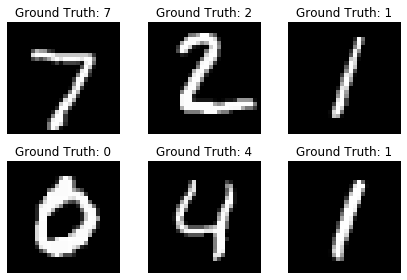

In [4]:
batch_size = 128
# MNIST
mnist_train_dataset = torchvision.datasets.MNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

mnist_test_dataset = torchvision.datasets.MNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

# We use drop_last=True to avoid the case where the data / batch_size != int

mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# let's plot some of the samples from the test set
examples = enumerate(mnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("shape: \n", example_data.shape)
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(example_data[i][0], cmap='gray', interpolation='none')
    ax.set_title("Ground Truth: {}".format(example_targets[i]))
    ax.set_axis_off()
plt.tight_layout()

shape: 
 torch.Size([128, 1, 28, 28])


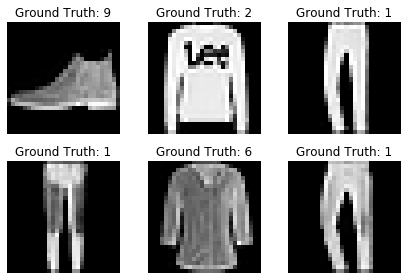

In [5]:
# Fashion-MNIST
fmnist_train_dataset = torchvision.datasets.FashionMNIST(root='./datasets/',
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

fmnist_test_dataset = torchvision.datasets.FashionMNIST(root='./datasets',
                                          train=False, 
                                          transform=torchvision.transforms.ToTensor())

# Data loader
fmnist_train_loader = torch.utils.data.DataLoader(dataset=fmnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True, drop_last=True)

fmnist_test_loader = torch.utils.data.DataLoader(dataset=fmnist_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# let's plot some of the samples from the test set
examples = enumerate(fmnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("shape: \n", example_data.shape)
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(example_data[i][0], cmap='gray', interpolation='none')
    ax.set_title("Ground Truth: {}".format(example_targets[i]))
    ax.set_axis_off()
plt.tight_layout()

### <img src="https://img.icons8.com/color/96/000000/broadcasting.png" style="height:50px;display:inline"> Multi-Layer Perceptron (MLP) in PyTorch
---
* An MLP (other names: Fully-Connected (FC) Network (FCN), Dense Network) is composed of one input layer, one or more hidden layers and a final output layer. 
* Every layer, except the output layer includes a bias neuron which is fully connected to the next layer.
* When the number of hidden layers is larger than 2, the network is usually called a deep neural network (DNN).

* The algorithm is composed of two main parts: **forward pass** and **backward pass**. 
* In the *forward pass*, for each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer (using the network for prediction is just doing a forward pass). Then, the output error (the difference between the desired output and the actual output from the network) is computed.

* After the output error calculation, the network calculates how much each neuron in the last hidden layer contributed to the output error (using the chain rule). 
* It then proceeds to measure how much of these error contributions came from each neuron in the previous layers until reaching the input layer. 
* This is the *backward pass*: measuring the error gradient across all the connection weights in the network by propagating the error gradient backward in the network (this is the backpropagation process).


* **In short**: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes in reverse to measure the error contribution from each connection (backward pass) and finally, using Gradient Descent, updates the weights in the direction that reduces the error.

<img src="./assets/tut_xiv_mlp.jpg" style="height:200px">

#### Implementing an MLP
---
We will now see how easy it is to implement a neural network using PyTorch. The first thing to know is that every neural network (NN) inherits from parent class `torch.nn.Module`, which establishes a shared workflow, that is, every (!) NN in PyTorch has the same properties in terms of functunality. This global design helps with building a common language. We will now meet PyTorch's basic blocks and see why it is so popular. 

We will implement the following network:
* Input dimension: 28 * 28
* Output dimension: 10 (as the number of classes)
* Batch size: 128
* Hidden Layers: 1
* Hidden Units: 256
* Optimizer: Adam (Learning Rate: 0.001)
* Activation: ReLU

In [6]:
# define a two-layer MLP
# method 1
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        Parameters:
            D_in - dimensions of inputs
            H - number of hidden units per layer
            D_out - dimensions of outputs
        """
        # initialzing the parent object (important!)
        super(TwoLayerNet, self).__init__()
        # define the first layer (hidden)
        self.linear1 = torch.nn.Linear(D_in, H)
        # define the second layer (output)
        self.linear2 = torch.nn.Linear(H, D_out)
        # define the activation function
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        Parameters:
            x - tensor of inputs (shape: [BATCH_SIZE, D_in])
        """
        h_relu = self.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred
    
# method 2
class TwoLayerNetPiped(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        Parameters:
            D_in - dimensions of inputs
            H - number of hidden units per layer
            D_out - dimensions of outputs
        """
        # initialzing the parent object (important!)
        super(TwoLayerNetPiped, self).__init__()
        # Create a pipeline - a sequence of layers
        self.pipe = torch.nn.Sequential(
            torch.nn.Linear(D_in, H), 
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        Parameters:
            x - tensor of inputs (shape: [BATCH_SIZE, D_in])
        """
        return self.pipe(x)

### When to use method 1 and when to use method 2?
If you want easy access to the weights of the layers (to do some manipulating on them or analyze them) then it is better to use method 1, otherwise, use method 2.

In [7]:
# hyper-parameters:
num_epochs = 10
learning_rate = 0.001

# Device configuration, as before
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# create model, send it to device
model = TwoLayerNetPiped(D_in=28*28, H=256, D_out=10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# Train the model
model.train()  # training mode
total_step = len(mnist_train_loader)
start_time = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train_loader):
        # each i is a batch of 128 samples
        images = images.to(device).view(batch_size, -1)  # represent images as column vectors
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize - ALWAYS IN THIS ORDER!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Time: {:.4f} secs' 
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), time.time() - start_time))

Epoch [1/10], Step [100/468], Loss: 0.4783, Time: 1.8672 secs
Epoch [1/10], Step [200/468], Loss: 0.1721, Time: 3.2621 secs
Epoch [1/10], Step [300/468], Loss: 0.1589, Time: 4.5964 secs
Epoch [1/10], Step [400/468], Loss: 0.1732, Time: 5.9777 secs
Epoch [2/10], Step [100/468], Loss: 0.2179, Time: 8.2756 secs
Epoch [2/10], Step [200/468], Loss: 0.2117, Time: 9.6090 secs
Epoch [2/10], Step [300/468], Loss: 0.1143, Time: 10.9415 secs
Epoch [2/10], Step [400/468], Loss: 0.1430, Time: 12.2827 secs
Epoch [3/10], Step [100/468], Loss: 0.1151, Time: 14.6643 secs
Epoch [3/10], Step [200/468], Loss: 0.0915, Time: 16.0267 secs
Epoch [3/10], Step [300/468], Loss: 0.2148, Time: 17.3831 secs
Epoch [3/10], Step [400/468], Loss: 0.1106, Time: 18.6888 secs
Epoch [4/10], Step [100/468], Loss: 0.0481, Time: 20.8634 secs
Epoch [4/10], Step [200/468], Loss: 0.0289, Time: 22.1266 secs
Epoch [4/10], Step [300/468], Loss: 0.0971, Time: 23.4104 secs
Epoch [4/10], Step [400/468], Loss: 0.0954, Time: 24.7019 sec

In [9]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance), or use:
with torch.no_grad(): # "don't keep track of the gradients" -> faster, can also use .detach()
    correct = 0
    total = 0
    for images, labels in mnist_test_loader:
        images = images.to(device).view(images.size(0), -1)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.78 %


### <img src="https://img.icons8.com/dusk/50/000000/xlarge-icons.png" style="height:50px;display:inline"> Extra - Convolutional Neural Networks
---
Let's first recap some of the basics:
### 2D Convolution
---
Convolution is moving a window or filter across the image being studied. This moving window applies to a certain neighborhood of nodes as shown below – here, the filter applied is (0.5 × the node value):
<img src="./assets/tut_xiv_filter.jpg" style="height:200px" />
In the convolutional part of the CNN, we can imagine this 2 x 2 moving filter sliding across all the available nodes / pixels in the input image. This operation can also be illustrated using standard neural network node diagrams:
<img src="./assets/tut_xiv_layer.jpg" style="height:200px" />
The first position of the moving filter connections is illustrated by the blue connections, and the second is shown with the green lines. The weights of each of these connections, as stated previously, is 0.5.

Calculating a convolutional layer output size:
We define the following:
* $W_{in}$ - the width of the input
* $F$ - filter size
* $P$ - padding
* $S$ -stride
The output width:
$$W_{out} = \frac{W_{in} - F + 2P}{S} + 1$$
In our example, the output of the convolutional layers, just before the FC:
$$W_{1, out} = \frac{28 - 5 + 2*2}{1} + 1 = 28 \rightarrow MaxPooling(2x2) \rightarrow 28 / 2 = 14$$
$$W_{2, out} = \frac{14 - 5 + 2*2}{1} + 1 = 14 \rightarrow MaxPooling(2x2) \rightarrow 14 / 2 = 7$$
So the input to the FC layer is $7x7=49$

### Feature mapping and multiple channels
---
Since the weights of individual filters are held constant as they are applied over the input nodes, they can be trained to select certain features from the input data. In the case of images, it may learn to recognize common geometrical objects such as lines, edges and other shapes which make up objects. This is where the name feature mapping comes from. Because of this, any convolution layer needs multiple filters which are trained to detect different features.

### Pooling
---
It is a sliding window type technique, but instead of applying weights, which can be trained, it applies a statistical function of some type over the contents of its window. The most common type of pooling is called max pooling, and it applies the max() function over the contents of the window.
There are two main benefits to pooling in CNN's:
1. It reduces the number of parameters in your model by a process called down-sampling
2. It makes feature detection more robust to object orientation and scale changes

Pooling generalizes over lower level, more complex information. Let’s imagine the case where we have convolutional filters that, during training, learn to detect the digit “9” in various orientations within the input images. In order for the Convolutional Neural Network to learn to classify the appearance of “9” in the image correctly, it needs to in some way “activate” whenever a “9” is found anywhere in the image, no matter what the size or orientation the digit is (except for when it looks like “6”, that is). Pooling can assist with this higher level, generalized feature selection. An example can be seen <a href="https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/">here</a>.

### Strides and down-sampling
---
In the pooling diagram below, you will notice that the pooling window shifts to the right each time by 2 places. This is called a stride of 2, which should be considered both in the x and y direction. In other words, the stride is actually specified as [2, 2]. One important thing to notice is that, if during pooling the stride is greater than 1, then the output size will be reduced. As can be observed below, the 5 x 5 input is reduced to a 3 x 3 output. This is a good thing – it is called down-sampling, and it reduces the number of trainable parameters in the model.

### Padding
---
In the pooling diagram below is that there is an extra column and row added to the 5 x 5 input – this makes the effective size of the pooling space equal to 6 x 6. This is to ensure that the 2 x 2 pooling window can operate correctly with a stride of [2, 2] and is called padding. These nodes are basically dummy nodes – because the values of these dummy nodes is 0, they are basically invisible to the max pooling operation. Padding will need to be considered when constructing our Convolutional Neural Network in PyTorch.
<img src="./assets/tut_xiv_max_pool.jpg" style="height:200px" />
* <a href="adventuresinmachinelearning.com">Image Source</a>

### The FC Layer
---
The fully connected layer can be thought of as attaching a standard classifier onto the information-rich output of the network, to “interpret” the results and finally produce a classification result. In order to attach this fully connected layer to the network, the dimensions of the output of the Convolutional Neural Network need to be flattened.


### CNN Vs. Fully Connected
---
Fully connected networks with a few layers can only do so much – to get close to state-of-the-art results in image classification it is necessary to go deeper. In other words, lots more layers are required in the network. However, by adding a lot of additional layers, we come across some problems. First, we can run into the vanishing gradient problem. However, this can be solved to an extent by using sensible activation functions, such as the ReLU family of activations. Another issue for deep fully connected networks is that the number of trainable parameters in the model (i.e. the weights) can grow rapidly. This means that the training slows down or becomes practically impossible, and also exposes the model to overfitting. CNNs try to solve this second problem by exploiting correlations between adjacent inputs in images. 

In [10]:
# let's build the ConvNet
# TRICK: if you don't want to manually calcualte the conv layers output size, you can use a dummy input
# to test the output dimension.
class ConvNet(nn.Module):
    def __init__(self, input_shape, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(input_shape[0], 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
#         self.fc = nn.Linear(7*7*32, num_classes)
        # or, use our TRICK:
        self.fc = nn.Linear(self._get_conv_out(input_shape), num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
    def _get_conv_out(self, shape):
        """
        Helper function to automatically calculate the conv layers output.
        """
        o = self.layer2(self.layer1((torch.zeros(1, *shape))))
        return int(np.prod(o.size()))

In [11]:
# hyper-parameters:
num_epochs = 5
learning_rate = 0.001
input_shape = [1, 28, 28] # num_channels, height, width

# Device configuration, as before
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# create model
model = ConvNet(input_shape=input_shape, num_classes=10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Train the model
total_step = len(mnist_train_loader)
start_time = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train_loader):
        # each i is a batch of 128 samples
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Time: {:.4f} secs' 
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), time.time() - start_time))

Epoch [1/5], Step [100/468], Loss: 0.1966, Time: 2.9221 secs
Epoch [1/5], Step [200/468], Loss: 0.0972, Time: 4.5916 secs
Epoch [1/5], Step [300/468], Loss: 0.0552, Time: 6.3140 secs
Epoch [1/5], Step [400/468], Loss: 0.0602, Time: 8.0174 secs
Epoch [2/5], Step [100/468], Loss: 0.0347, Time: 10.9237 secs
Epoch [2/5], Step [200/468], Loss: 0.0090, Time: 12.6321 secs
Epoch [2/5], Step [300/468], Loss: 0.0777, Time: 14.3456 secs
Epoch [2/5], Step [400/468], Loss: 0.0507, Time: 15.9792 secs
Epoch [3/5], Step [100/468], Loss: 0.0621, Time: 18.7488 secs
Epoch [3/5], Step [200/468], Loss: 0.0225, Time: 20.4073 secs
Epoch [3/5], Step [300/468], Loss: 0.0218, Time: 22.0461 secs
Epoch [3/5], Step [400/468], Loss: 0.0728, Time: 23.6847 secs
Epoch [4/5], Step [100/468], Loss: 0.0216, Time: 26.4405 secs
Epoch [4/5], Step [200/468], Loss: 0.0211, Time: 28.0821 secs
Epoch [4/5], Step [300/468], Loss: 0.0085, Time: 29.7826 secs
Epoch [4/5], Step [400/468], Loss: 0.0094, Time: 31.5079 secs
Epoch [5/5],

In [13]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad(): # "don't keep track of the gradients" ,can also use .detach()
    correct = 0
    total = 0
    for images, labels in mnist_test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.83 %


## <img src="https://img.icons8.com/color/96/000000/code.png" style="height:50px;display:inline"> Autoencoders
---
* Most of the natural data is high-dimensional, such as images. Consider the MNIST (hand-written digits) dataset, where each image has $28x28=784$ pixels, which means it can be represented by a vector of length 784. 
    * But do we really need 784 values to represent a digit? The answer is no. We believe that the data lies on a low-dimensional space which is enough to describe the observasions. In case of MNIST, we can choose to represent digits as one-hot vectors, which means we only need 10 dimensions. So we can **encode** high-dimensional observations in a low-dimensional space.
    * But how can we learn meaningful low-deminsional representations? The general idea is to reconstruct or, **decode** the low-dimensional representation to the high-dimensional reperesentation, and use the reconstruction error to find the best representations (using the gradients of the error) . This is the core idea behind **autoencoders**.
    * **Autoencoders** - models which take data as input and discover some latent state representation of that data.The input data is converted into an encoding vector where each dimension represents some learned attribute about the data. The most important detail to grasp here is that our encoder network is outputting a single value for each encoding dimension. The decoder network then subsequently takes these values and attempts to recreate the original input. Autoencoders have **three parts**: an encoder, a decoder, and a 'loss' function that maps one to the other. For the simplest autoencoders - the sort that compress and then reconstruct the original inputs from the compressed representation - we can think of the 'loss' as describing the amount of information lost in the process of reconstruction.
        * Illustration: <img src="./assets/tut_xv_autoencoder.png" style="height:250px">
        
* The basic architecture of an autoencoder:
<img src="./assets/tut_xiv_autoencoder.png" style="height:250px">
* <a href="https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798">Image Source</a>
    
Let's implement it in PyTorch using what we have learnt so far!

In [15]:
class AutoEncoder(nn.Module):
    
    def __init__(self, input_dim=28*28, hidden_dim=256, latent_dim=10):
        super(AutoEncoder, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        
        # define the encoder
        self.encoder = nn.Sequential(nn.Linear(self.input_dim, self.hidden_dim),
                                     nn.ReLU(), nn.Linear(self.hidden_dim, self.hidden_dim),
                                     nn.ReLU(),
                                     nn.Linear(self.hidden_dim, self.latent_dim)
                                    )
        
        # define decoder
        self.decoder = nn.Sequential(nn.Linear(self.latent_dim, self.hidden_dim),
                                     nn.ReLU(),
                                     nn.Linear(self.hidden_dim, self.hidden_dim),
                                     nn.ReLU(),
                                     nn.Linear(self.hidden_dim, self.input_dim),
                                     nn.Sigmoid())
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def get_latent_rep(self, x):
        return self.encoder(x)

In [15]:
# hyper-parameters:
num_epochs = 5
learning_rate = 0.001

# Device configuration, as before
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# create model, send it to device
model = AutoEncoder(input_dim=28 * 28, hidden_dim=128, latent_dim=10).to(device)

# Loss and optimizer
criterion = nn.BCELoss()  # binary cross entropy, as pixels are in [0,1]
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
# Train the model
total_step = len(fmnist_train_loader)
start_time = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(fmnist_train_loader):
        # each i is a batch of 128 samples
        images = images.to(device).view(batch_size, -1)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        
        # Backward and optimize - ALWAYS IN THIS ORDER!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Time: {:.4f} secs' 
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), time.time() - start_time))

Epoch [1/5], Step [100/468], Loss: 0.3697, Time: 1.8620 secs
Epoch [1/5], Step [200/468], Loss: 0.3328, Time: 3.6951 secs
Epoch [1/5], Step [300/468], Loss: 0.3261, Time: 5.5362 secs
Epoch [1/5], Step [400/468], Loss: 0.3315, Time: 7.3733 secs
Epoch [2/5], Step [100/468], Loss: 0.3160, Time: 10.4680 secs
Epoch [2/5], Step [200/468], Loss: 0.2970, Time: 12.3111 secs
Epoch [2/5], Step [300/468], Loss: 0.3030, Time: 14.1701 secs
Epoch [2/5], Step [400/468], Loss: 0.2982, Time: 16.0132 secs
Epoch [3/5], Step [100/468], Loss: 0.3164, Time: 19.1069 secs
Epoch [3/5], Step [200/468], Loss: 0.2908, Time: 20.9400 secs
Epoch [3/5], Step [300/468], Loss: 0.2857, Time: 22.7841 secs
Epoch [3/5], Step [400/468], Loss: 0.2917, Time: 24.5992 secs
Epoch [4/5], Step [100/468], Loss: 0.3136, Time: 27.7169 secs
Epoch [4/5], Step [200/468], Loss: 0.2937, Time: 29.5440 secs
Epoch [4/5], Step [300/468], Loss: 0.3024, Time: 31.3981 secs
Epoch [4/5], Step [400/468], Loss: 0.2916, Time: 33.2152 secs
Epoch [5/5],

shape: 
 torch.Size([128, 1, 28, 28])


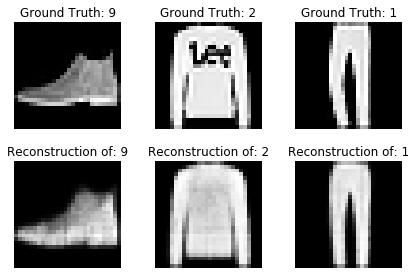

In [17]:
# let's see some of the reconstructions
model.eval()  # put in evaluation mode - no gradients
examples = enumerate(fmnist_test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("shape: \n", example_data.shape)
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(example_data[i][0], cmap='gray', interpolation='none')
    ax.set_title("Ground Truth: {}".format(example_targets[i]))
    ax.set_axis_off()
    
    ax = fig.add_subplot(2,3,i+4)
    recon_img = model(example_data[i][0].view(1, -1).to(device)).data.cpu().numpy().reshape(28, 28)
    ax.imshow(recon_img, cmap='gray')
    ax.set_title("Reconstruction of: {}".format(example_targets[i]))
    ax.set_axis_off()
plt.tight_layout()

In [18]:
# let's compare different dimensionality reduction methods
n_neighbors = 10
n_components = 2
n_points= 500

fmnist_test_loader = torch.utils.data.DataLoader(dataset=fmnist_test_dataset,
                                          batch_size=n_points, 
                                          shuffle=False)
X, labels = next(iter(fmnist_test_loader))
latent_X = model.get_latent_rep(X.to(device).view(n_points, -1)).data.cpu().numpy()
labels = labels.data.cpu().numpy()

PCA time: 0.001 sec
KPCA time: 0.009 sec
LLE time: 0.083 sec
Isomap time: 0.11 sec
t-SNE time: 2.5 sec


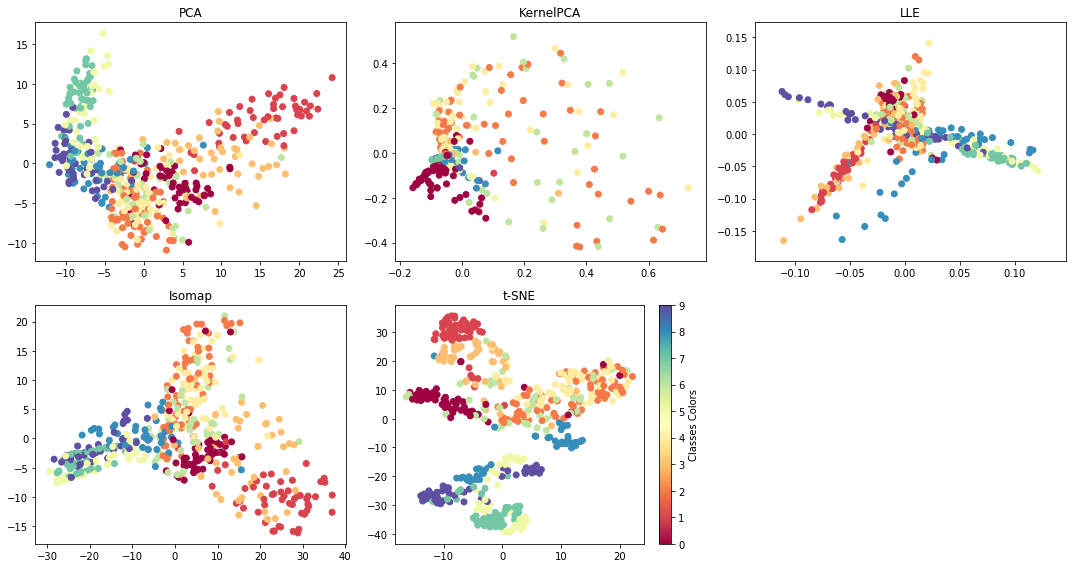

In [21]:
fig = plt.figure(figsize=(15,8))

# PCA
t0 = time.time()
x_pca = PCA(n_components).fit_transform(latent_X)
t1 = time.time()
print("PCA time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 1)
ax.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap=plt.cm.Spectral)
ax.set_title('PCA')

# KPCA
t0 = time.time()
x_kpca = KernelPCA(n_components, kernel='rbf').fit_transform(latent_X)
t1 = time.time()
print("KPCA time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 2)
ax.scatter(x_kpca[:, 0], x_kpca[:, 1], c=labels, cmap=plt.cm.Spectral)
ax.set_title('KernelPCA')

# LLE
t0 = time.time()
x_lle = LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto').fit_transform(latent_X)
t1 = time.time()
print("LLE time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 3)
ax.scatter(x_lle[:, 0], x_lle[:, 1], c=labels, cmap=plt.cm.Spectral)
ax.set_title('LLE')

# Isomap
t0 = time.time()
x_isomap = Isomap(n_neighbors, n_components).fit_transform(latent_X)
t1 = time.time()
print("Isomap time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 4)
ax.scatter(x_isomap[:, 0], x_isomap[:, 1], c=labels, cmap=plt.cm.Spectral)
ax.set_title('Isomap')

# t-SNE
t0 = time.time()
x_tsne = TSNE(n_components).fit_transform(latent_X)
t1 = time.time()
print("t-SNE time: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 3, 5)
scatter = ax.scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels, cmap=plt.cm.Spectral)
ax.set_title('t-SNE')

bounds = np.linspace(0, 10, 11)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
cb.set_label('Classes Colors')

plt.tight_layout()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* PyTorch - <a href="https://www.youtube.com/watch?v=_H3aw6wkCv0&t=2s">Stefan Otte: Deep Neural Networks with PyTorch | PyData Berlin 2018</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/